<a href="https://colab.research.google.com/github/psst54/startTensorflow/blob/master/weekly/2_1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# data 로드하기

import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

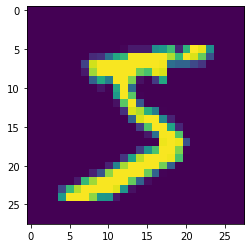

5


In [40]:
# data 확인하기

import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
print(y_train[0])

In [41]:
# data를 정규화한다.
x_train, x_test = x_train / 255.0, x_test / 255.0

In [42]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(units=128, activation='relu'),
                                    tf.keras.layers.Dense(units=10, activation='softmax')
])
# Flatten 레이어는 다차원 데이터를 1차원으로 정렬한다.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9258
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.9676
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0759 - accuracy: 0.9767
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9831
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0436 - accuracy: 0.9863
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0352 - accuracy: 0.9892
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272 - accuracy: 0.9914
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0194 - accuracy: 0.9936
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

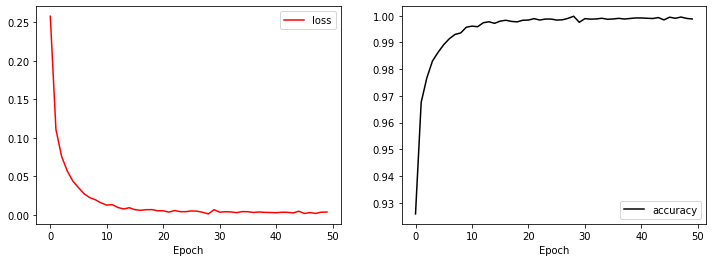

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'r-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'k-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [45]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1504 - accuracy: 0.9793


[0.15037019550800323, 0.9793000221252441]

콜백 함수를 이용해 학습을 조기종료 시켜보자.

In [46]:
model_2 = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(units=128, activation='relu'),
                                    tf.keras.layers.Dense(units=10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model_2.fit(x_train, y_train, epochs=50, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='accuracy')])

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2601 - accuracy: 0.9244
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1112 - accuracy: 0.9667
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0760 - accuracy: 0.9773
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0561 - accuracy: 0.9833
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0435 - accuracy: 0.9863
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0336 - accuracy: 0.9898
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0280 - accuracy: 0.9911
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0226 - accuracy: 0.9931
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0178 - accuracy: 0.9949
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

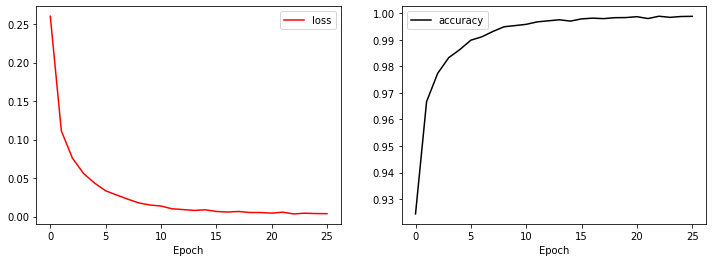

313/313 [==============================] - 0s 1ms/step - loss: 0.1213 - accuracy: 0.9768


[0.12128670513629913, 0.9768000245094299]

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'r-', label='loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'k-', label='accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()


model_2.evaluate(x_test, y_test)